<h1 style="color:red">Matplotlib</h1>
<h4>Explorando - Visualización de datos</h4>

## Indicadores de Desarrollo Mundial

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('wdi/Indicators.csv')
data.shape

(5656458, 6)

In [3]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [4]:
filter = data['CountryName']=='Colombia'
data[filter].head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7264,Colombia,COL,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.279940e+02
7265,Colombia,COL,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,9.846913e+01
7266,Colombia,COL,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.296202e+00
7267,Colombia,COL,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,9.217292e+01
7268,Colombia,COL,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.000000e+06


<h2>¿Cuantos países hay?</h2>

In [5]:
countries = data['CountryName'].unique().tolist()
print("Países -> ",len(countries))

Países ->  247


<h2>¿Cuantos códigos de paises hay?</h2>

In [6]:
countriesCodes = data['CountryCode'].unique().tolist()
print("Códigos de Países -> ",len(countriesCodes))
print(countriesCodes)

Códigos de Países ->  247
['ARB', 'CSS', 'CEB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'FCS', 'HPC', 'HIC', 'NOC', 'OEC', 'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'OSS', 'PSS', 'SST', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD', 'AFG', 'ALB', 'DZA', 'ASM', 'ADO', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHI', 'CHL', 'CHN', 'COL', 'COM', 'ZAR', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMY', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'PRK', 'KOR', 'KSV', 'KWT', 'KGZ', 'LAO', 

<h2>¿Cuantos indicadores hay?</h2>

In [7]:
indicators = data['IndicatorName'].unique().tolist()
print("INdicadores -> ",len(indicators))

INdicadores ->  1344


<h2>¿Datos de cuantos años hay?</h2>

In [8]:
years = data['Year'].unique().tolist()
print("Años -> ",len(years))

Años ->  56


<h2>¿Cual es el rango temporal?</h2>

In [9]:
print("de ",min(years), "a", max(years))

de  1960 a 2015


<h1>Matplotlib: Gráficos básicos</h1>
Se explorará las emisiones per cápita de un país en particular

In [10]:
hist_indicator = "CO2 emissions \(metric" # no hay necesidad de escribir el nombre completo del indicador
hist_country = 'COL'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

#Se aplican las mascaras
total_co2 = data[mask1 & mask2]
total_co2.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4353089,Colombia,COL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2007,1.406900
4533525,Colombia,COL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2008,1.451147
4713069,Colombia,COL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2009,1.484764
4894345,Colombia,COL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,1.711391
5077851,Colombia,COL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,1.560629


<h2>Como cambiaron las emisiones de co2 a lo largo del tiempo</h2>

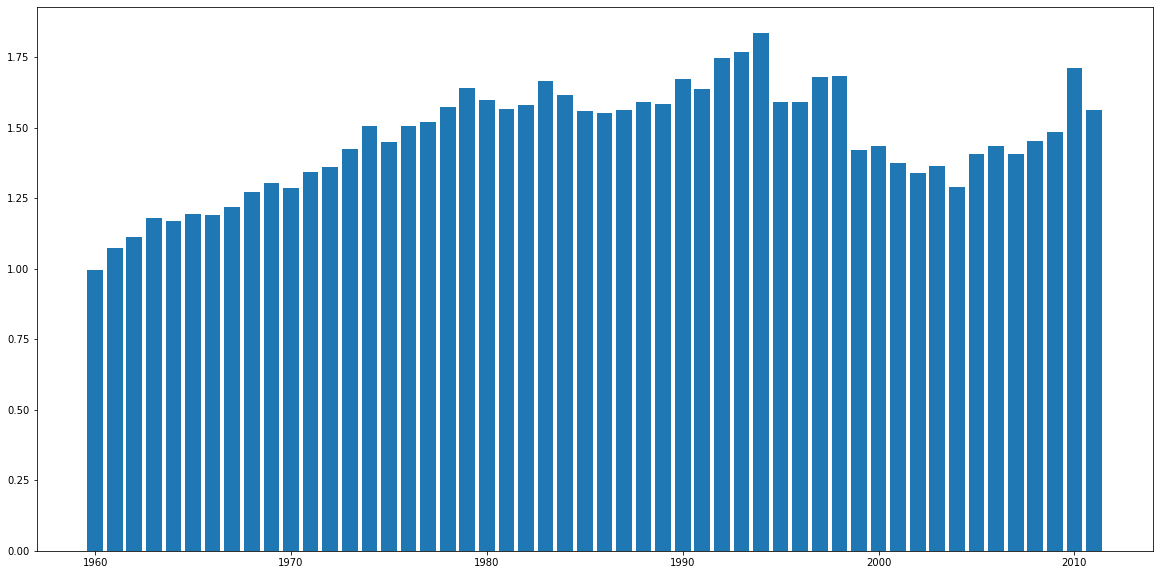

In [11]:
#obtenemos los años
years = total_co2['Year']

#obtenemos los valores de cada año
co2 = total_co2['Value']

#dibujamos
plt.figure(figsize=(20,10))
plt.bar(years,co2)
plt.show()

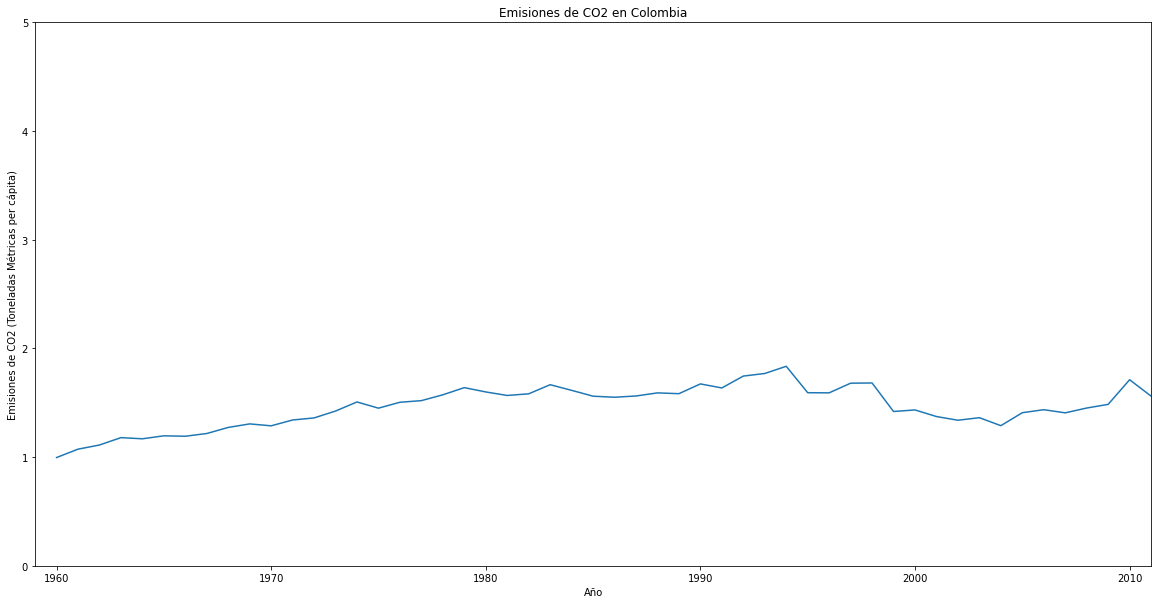

In [12]:
#Cambiamos a gráfico de lineas
plt.figure(figsize=(20,10))
plt.plot(total_co2['Year'],total_co2['Value'])
plt.xlabel('Año')
plt.ylabel('Emisiones de CO2 (Toneladas Métricas per cápita)')
plt.title('Emisiones de CO2 en Colombia')

#Se puede retocar la escala
plt.axis([1959,2011,0,5])
plt.show()

<h2>Usando histogramas para explorar la distribución de valores</h2>

In [13]:
hist_data = total_co2['Value']
hist_data

7274       0.995719
31608      1.072743
58794      1.110986
87176      1.178781
115902     1.168264
145813     1.195439
177578     1.191687
209297     1.216835
241932     1.272615
274662     1.305149
316199     1.287535
380001     1.341151
448847     1.360067
518715     1.423461
588485     1.506910
659261     1.449946
731940     1.504107
806025     1.519168
881586     1.572807
957352     1.638779
1034969    1.599113
1117631    1.566772
1202243    1.581778
1287373    1.665690
1372954    1.613838
1459424    1.560016
1546890    1.550410
1635254    1.561897
1724389    1.590435
1815131    1.583189
1915433    1.673026
2032496    1.635915
2149511    1.744983
2271971    1.768804
2396241    1.835017
2524231    1.592181
2659226    1.590776
2794830    1.679619
2931496    1.681617
3069740    1.419215
3216048    1.433620
3369289    1.372903
3520775    1.338900
3675687    1.362245
3829986    1.288990
3995113    1.407985
4174864    1.435823
4353089    1.406900
4533525    1.451147
4713069    1.484764


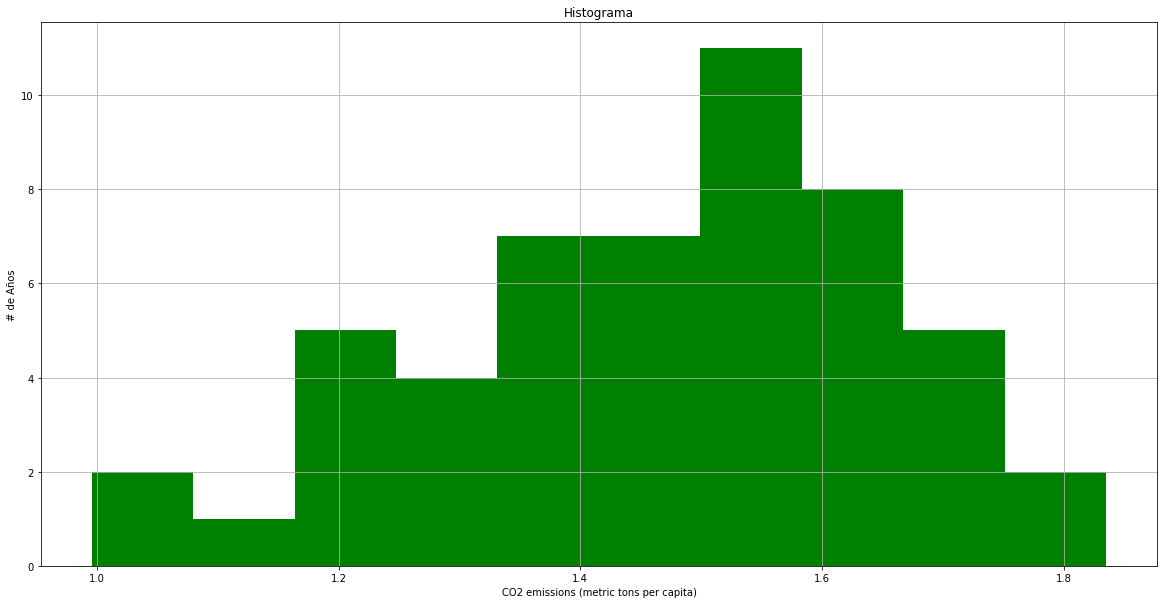

In [14]:
plt.figure(figsize=(20,10))
plt.hist(hist_data,10,facecolor='green')
plt.xlabel(total_co2['IndicatorName'].iloc[0])
plt.ylabel('# de Años')
plt.title('Histograma')

plt.grid(True)
plt.show()

<h2>Como está el país respecto a otros?</h2>

In [15]:
hist_indicator = 'CO2 emissions \(metric'
hist_year=2011


mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

#Se aplican las mascaras
co2_2011 = data[mask1 & mask2]
co2_2011.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5198435,Vietnam,VNM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,1.971889
5199322,West Bank and Gaza,WBG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,0.572407
5199936,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,0.919968
5200687,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,0.212450
5201543,Zimbabwe,ZWE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,0.691698


In [16]:
print(len(co2_2011))

232


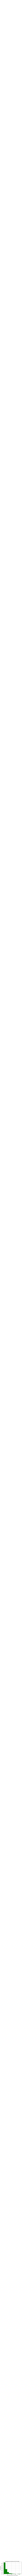

In [17]:
fig, ax = plt.subplots()

ax.annotate("COLOMBIA",
           xy=(20,5), xycoords='data',
           xytext=(23,30), textcoords='data',
           arrowprops=dict(arrowstyle='->',connectionstyle='arc3'),
           )

plt.hist(co2_2011['Value'],10,density = True, facecolor='green')

plt.xlabel(total_co2['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histograma de emisiones CO2 Per Capita')

plt.grid(True)
plt.show()

In [18]:
hist_indicator = 'GDP per capita \(constant 2005'
hist_country='COL'


mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

#Se aplican las mascaras
gdp_stage = data[mask1 & mask2]

In [20]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7313,Colombia,COL,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,1410.751644
31650,Colombia,COL,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,1441.141358


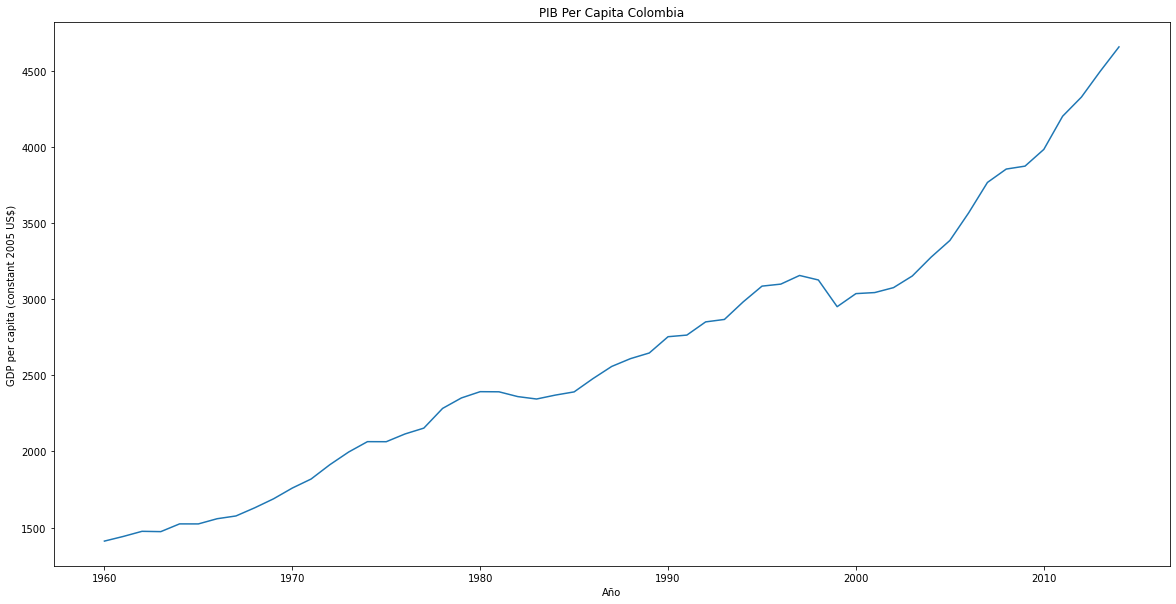

In [21]:
#Dibujamos un gráfico de linea
plt.figure(figsize=(20,10))
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

plt.xlabel('Año')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

plt.title('PIB Per Capita Colombia')

plt.show()

<h2>Gráfico de dispersión para comparar PIB vs CO2</h2>
Se debe asegurar que tanto PIB como CO2 están en las mismas ventanas temporales

In [22]:
print("PIB Min Year ->",gdp_stage['Year'].min(), "max ->",gdp_stage['Year'].max())
print("CO2 Min Year->",total_co2['Year'].min(), "max ->",total_co2['Year'].max())

PIB Min Year -> 1960 max -> 2014
CO2 Min Year-> 1960 max -> 2011


In [27]:
#Se tienen 3 años adicionales de PIB con respecto a CO2
gdp_stage_trunc = gdp_stage[gdp_stage['Year']<2012]
print(len(gdp_stage_trunc))
print(len(total_co2))

52
52


<Figure size 1440x720 with 0 Axes>

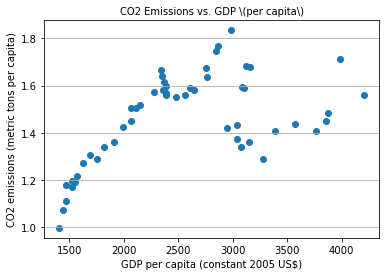

In [32]:
plt.figure(figsize=(20,10))
fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)', fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(total_co2['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = total_co2['Value']

axis.scatter(X,Y)
plt.show()

In [33]:
np.corrcoef(gdp_stage_trunc['Value'],total_co2['Value'])

array([[1.        , 0.54815504],
       [0.54815504, 1.        ]])